In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.metrics import accuracy_score
from math import log

import scipy.io as sio

%matplotlib inline

In [2]:
data = sio.loadmat('data/ex4data1.mat')
x = pd.DataFrame(data['X'])
X = np.c_[np.ones((x.shape[0], 1)), x]
y = pd.DataFrame(data['y'])

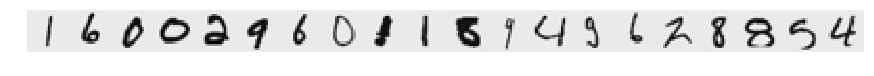

In [3]:
sample = np.random.choice(X.shape[0], 20)
fig, ax = plt.subplots(figsize=(15, 2))
plt.imshow(X[sample,1:].reshape(-1,20).T,cmap='binary')
plt.axis('off')
plt.show()

In [4]:
data2 = sio.loadmat('data/ex4weights.mat')
c_theta = [pd.DataFrame(data2['Theta1']), pd.DataFrame(data2['Theta2'])]

In [5]:
c_theta[0].shape

(25, 401)

In [6]:
c_theta[1].shape

(10, 26)

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) 

##### Forward Propagation

<img src="img/fd.png"/>

In [8]:
def forward_all(x, theta):    
    a = [x]
    L = 3 #Number of layers 
    for i in range(L-1):
        ai_add = np.c_[np.ones((a[i].shape[0], 1)), a[i]]
        z = ai_add.dot(theta[i].T)
        a.append(sigmoid(z))
    return a

def forward(xi, theta): #Just do the forward for one object
    a = [xi]
    L = 3 #Number of layers 
    for i in range(L-1):
        ai_add = pd.concat([pd.Series([1]), a[i]])
        ai_add = ai_add.reset_index(drop=True)
        z = theta[i].dot(ai_add)
        a.append(sigmoid(z))
    return a

##### Cost Function

The cost function for neural networks with regularization is given by:

<img src="img/cost_func_neural.png"/>

In [13]:
def cost_function(x, y, theta, l):
    K = theta[1].shape[0]
    m = x.shape[0]
    
    a = forward_all(x, theta)
    
    J = -1*(1/m)*np.sum((np.log(a[2].T)*(y)+np.log(1-a[2]).T*(1-y))) + \
        (l/(2*m))*(np.sum(np.square(theta1[:,1:])) + np.sum(np.square(theta2[:,1:])))
    
    return J

In [14]:
cost_function(x, y, c_theta, 1)

ValueError: operands could not be broadcast together with shapes (10,5000) (5000,1) 